# Simulating Responses of the H1 Neuron

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Spike-triggered average

In [2]:
from scipy.io import loadmat

In [3]:
variables = loadmat('c1p8.mat')
rho = variables['rho'].flatten()  # make column vector
stim = variables['stim'].flatten()

In [4]:
dt = 2  # in ms
T = len(rho) * dt  # in ms
dt, T

(2, 1200000)

In [5]:
rho.shape, rho

((600000,), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

In [6]:
stim.shape, stim

((600000,),
 array([-111.94824219,  -81.80664062,   10.21972656, ...,    9.78515625,
          24.11132812,   50.25390625]))

In [19]:
C = np.zeros(150)
n = rho.sum()

In [20]:
for i in range(len(C)):
    C[i] = np.trapz(rho * np.roll(stim, i), dx=dt) / n

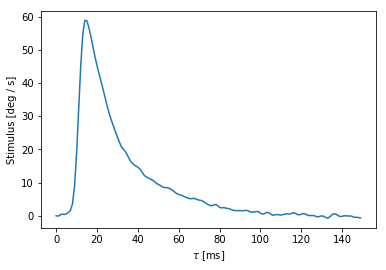

In [27]:
plt.plot(C)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel('Stimulus [deg / s]')

## 2. Linear Kernel

In [28]:
mean_firing_rate = rho.sum() / T
mean_firing_rate

0.044667499999999999

In [29]:
stimulus_variance = stim.var() * dt
stimulus_variance

5107.3371573681397

In [32]:
D = mean_firing_rate * C / stimulus_variance

## 3. Linear extimate of the firing rate

In [131]:
r_est = dt * np.convolve(D, stim, mode='same')
r_est -= r_est.mean()
r_est += mean_firing_rate

In [132]:
sliding_window_function = lambda tau, delta: 1 / delta if tau >= -delta/2 and tau < delta/2 else 0

In [139]:
t = np.linspace(-100, 100, 100)
swf = np.array([sliding_window_function(i, 90) for i in t])
r = np.convolve(np.roll(rho, -50), swf)

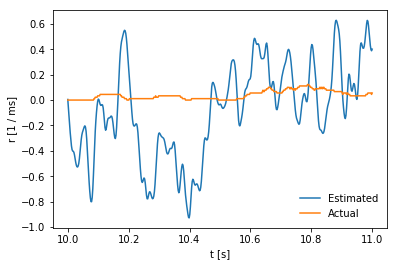

In [145]:
plt.plot(np.linspace(10, 11, 500), r_est[5000:5500], label='Estimated')
plt.plot(np.linspace(10, 11, 500), r[5000:5500], label='Actual')
#plt.plot(np.linspace(10, 11, 500), rho[5000:5500])
plt.xlabel('t [s]')
plt.ylabel('r [1 / ms]')
plt.legend(frameon=False)